In [1]:
import sys 
import os

if 'fast_shapelets' not in [el.split('/')[-1] for el in sys.path]:
    curr_path = os.getcwd()
    sys.path.append('/'.join((curr_path.split('/')[:-1])))

In [2]:
from src import get_dataset, SAX, FastShapelet
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train,y_train, X_test, y_test = get_dataset('StarLightCurves')
y_train = y_train-1
y_test = y_test-1

Dataset StarLightCurves loading from cache 



In [53]:
X = X_train[:500]
y = y_train[:500]

In [5]:
X.shape

(100, 1024)

In [6]:
1024%10

4

In [7]:
from numpy.lib.stride_tricks import sliding_window_view

a = sliding_window_view(X,202,axis=1)

In [8]:
a.shape

(100, 823, 202)

In [54]:
fs = FastShapelet(11, 203, 202, n_jobs=1, verbose=1)

In [55]:
fs.fit(X,y)

(48345,)
(500, 823, 202)
(48340,)
(500, 822, 203)


In [56]:
shap_dict = fs.get_shapelets()

In [21]:
len(shap_dict[202])

2

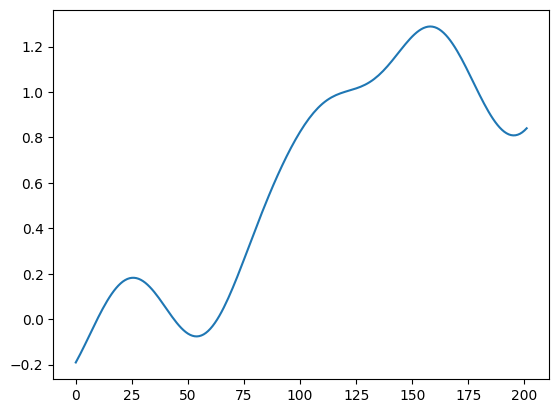

In [22]:
plt.plot(shap_dict[202][0][0])

In [11]:
sax_strings = SAX(dimensionnality=word_len, cardinality=cardinality).transform(a)
collision_table, objs, idx_table = fs._compute_collision_table(sax_strings, r=10)
distinguishing_scores = fs._compute_distinguishing_score(collision_table, y)
top_k = fs._find_top_k(distinguishing_scores, k=10)



In [27]:
raw_data_top_k = a[idx_table[top_k], np.where(objs[top_k])]

(8119,)

In [18]:
a[idx_table[top_k], :].shape

(10, 823, 202)

In [33]:
idxs

[771, 806, 679, 751, 553, 662, 566, 789, 695, 749]

In [12]:
idxs = np.array([np.where(sax_strings[idx_table[_id], :]==objs[_id])[0][0] for _id in top_k])
shapelets = a[idx_table[top_k], idxs]

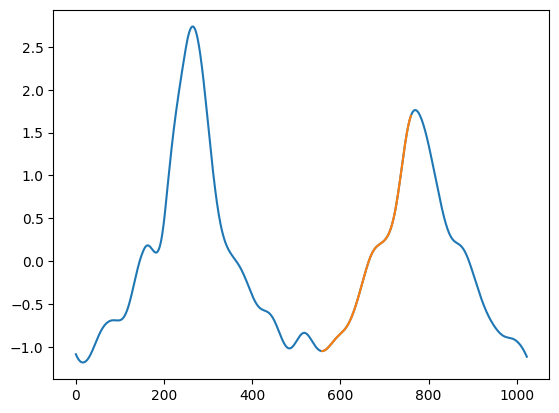

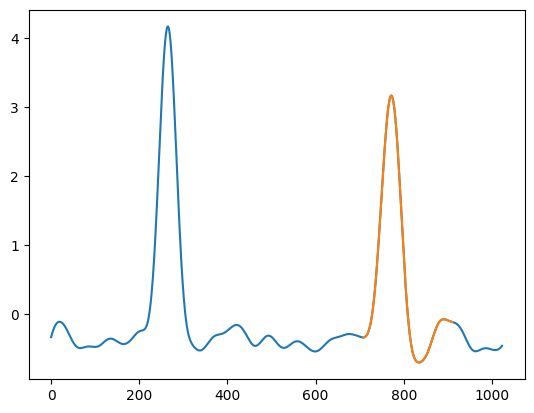

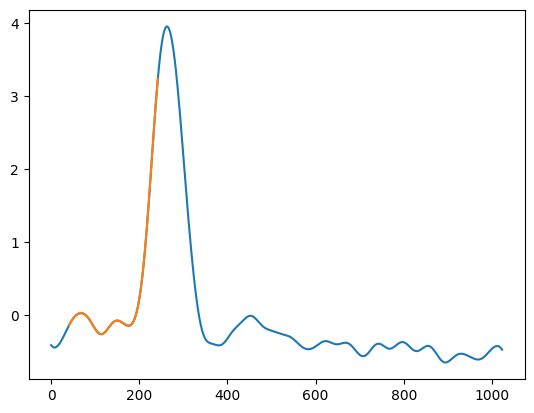

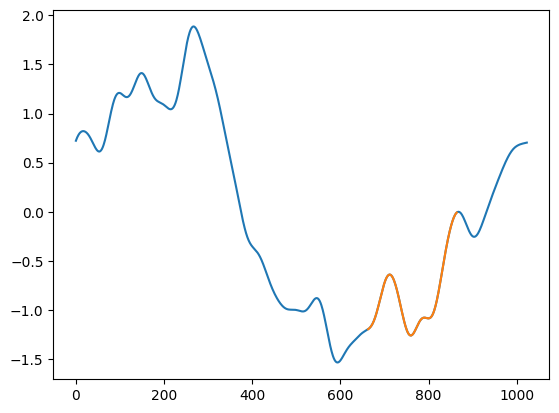

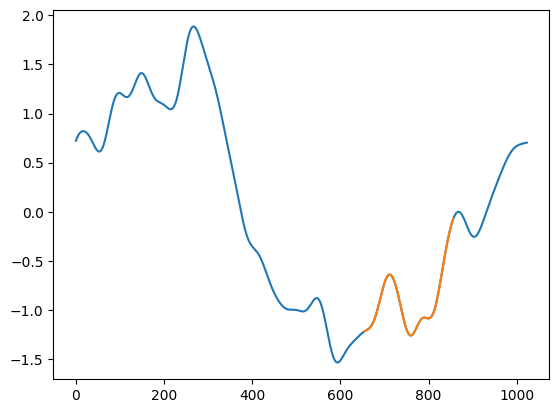

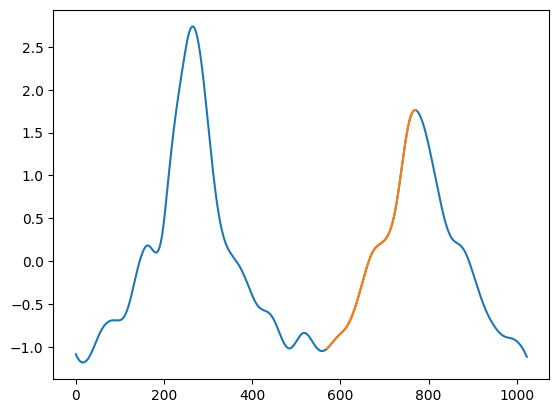

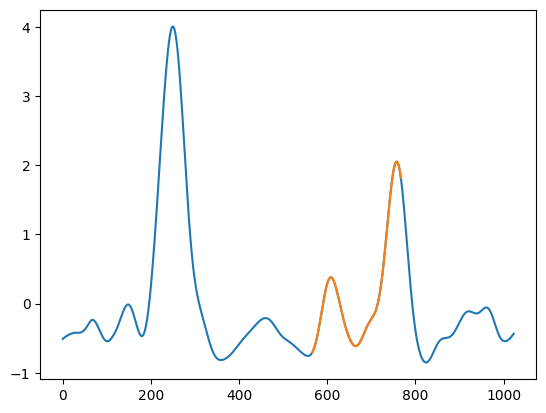

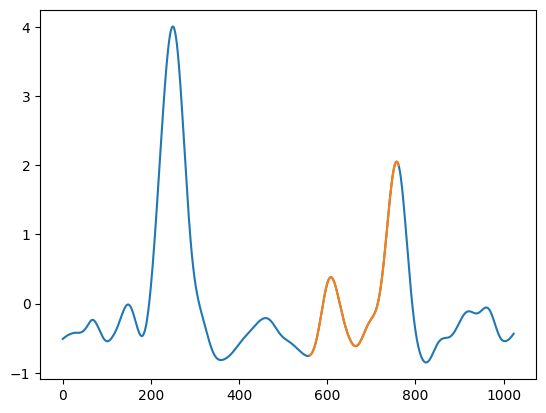

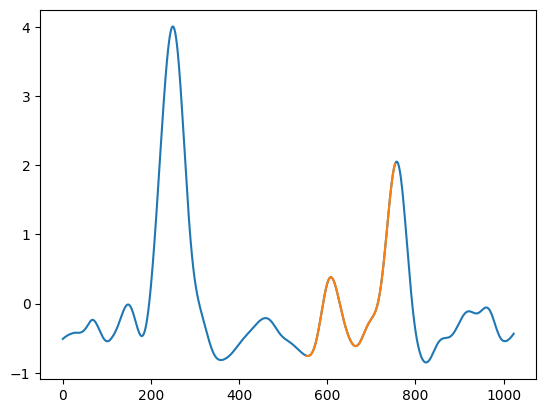

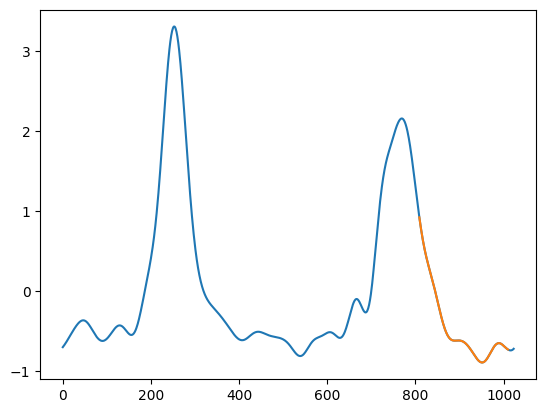

In [13]:
for x,y in zip(idx_table[top_k], idxs):
    plt.plot(X[x])
    plt.plot(np.arange(y, y+202) , a[x,y])
    plt.show()

In [16]:
np.where(a[idx_table[top_k], :]==objs[top_k])

/var/folders/tw/0_4t24xd3vs3yb_2z5jssqnc0000gn/T/ipykernel_53178/1945625611.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np.where(a[idx_table[top_k], :]==objs[top_k])


(array([], dtype=int64),)

In [ ]:
fs = FastShapelet(11, 10)
word_len = 10
cardinality = 5

In [ ]:
objs = [np.unique(multiple_sax_string) for multiple_sax_string in sax_strings]

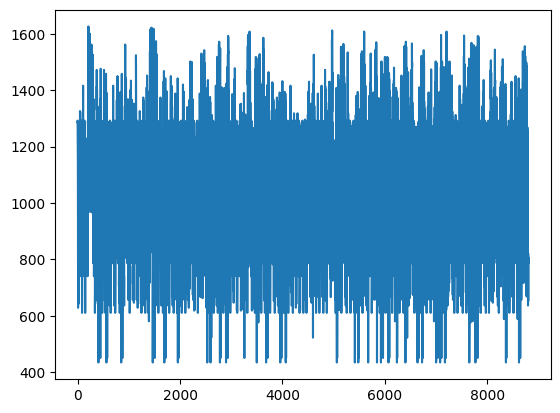

In [ ]:
plt.plot(distinguishing_scores)

In [12]:
raw_data_top_k.shape

(1, 10, 202)

In [61]:
b.shape

(10, 100, 2)

In [18]:
objs = [np.unique(multiple_sax_string) for multiple_sax_string in sax_strings]

In [19]:
objs



[array(['aaaaaaaaaa', 'aaaaaaaaab', 'aaaaaaaabb', 'aaaaaaabbb',
        'aaaaaabbbb', 'aaaaabbbbb', 'aaaabbbbbb', 'aaabbbbbbb',
        'aaabbbbbbc', 'aabbbbbbbc', 'aabbbbbbcc', 'abbbbbbbcc',
        'abbbbbbccc', 'baaaaaaaaa', 'bbaaaaaaaa', 'bbbaaaaaaa',
        'bbbbaaaaaa', 'bbbbbaaaaa', 'bbbbbbaaaa', 'bbbbbbbccc',
        'bbbbbbcccc', 'bbbbbccccc', 'bbbbcccccc', 'bbbccccccc',
        'bbcccccccc', 'bccccccccc', 'bccccccccd', 'cbbbbbaaaa',
        'cbbbbbbaaa', 'ccbbbbbaaa', 'ccbbbbbbaa', 'cccbbbbbaa',
        'cccccccccd', 'ccccccccdd', 'cccccccddd', 'ccccccdddd',
        'dccbbbbbaa', 'dccbbbbbba', 'dcccbbbbba', 'ddccbbbbba',
        'ddccbbbbbb', 'ddcccbbbbb', 'dddccbbbbb', 'dddcccbbbb',
        'ddddccbbbb', 'ddddcccbbb', 'dddddccbbb', 'dddddcccbb',
        'ddddddccbb', 'ddddddcccb', 'dddddddccb', 'dddddddccc',
        'ddeeeeedde', 'ddeeeeeeee', 'deeeeeddee', 'deeeeeedde',
        'deeeeeeeee', 'edddddddcc', 'eddeeeeeee', 'eedddddddc',
        'eeddeeeeee', 'eeeddddddd', 'eee

In [26]:
X.shape

(100, 1024)

In [25]:
a.shape

(100, 1015, 10)

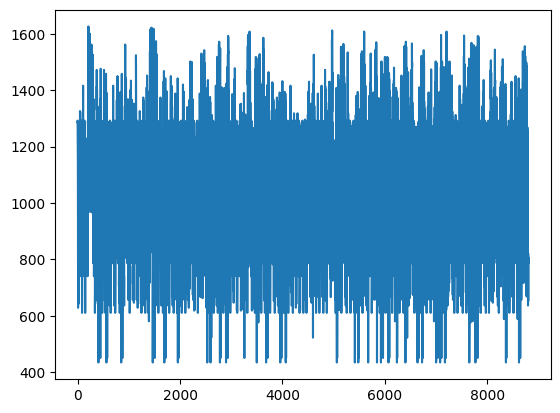

In [20]:
plt.plot(distinguishing_scores)

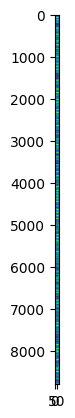

In [21]:
plt.imshow(collision_table)

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

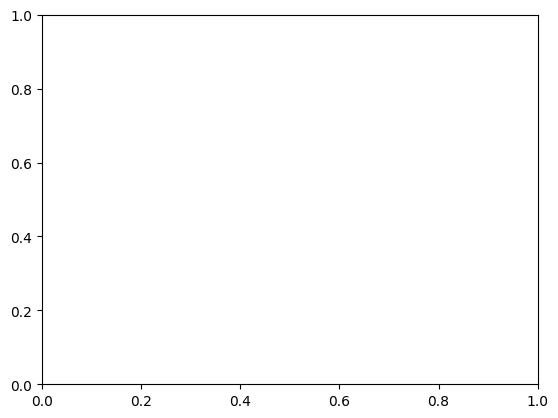

In [24]:
plt.plot(np.arange(4), shap[4][0][2])

In [30]:
shap

{2: [[array([-0.01298523,  0.01298523]),
   -0.00035209162507401914,
   0.029622063329928672],
  [array([ 0.10601408, -0.10601408]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([ 0.02664021, -0.02664021]),
   -0.008684544625621404,
   0.6161616161616161]],
 3: [[array([ 0.88752545, -1.20634202,  0.31621386]),
   -0.018038025485044296,
   -0.39393939393939403]],
 4: [[array([ 1.20561958, -0.28855829, -1.15036594,  0.23330464]),
   -0.018038025485044296,
   -0.39393939393939403]],
 5: [[array([-0.38225795,  1.13805239, -0.64803329,  0.34004375, -0.43542791]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([-0.3058173 ,  0.83462886, -0.36780024,  0.22273417, -0.38134801]),
   -0.008684544625621404,
   0.6161616161616161],
  [array([ 1.23747837,  0.43183996, -1.14450761, -0.77980183,  0.23565429]),
   -0.018038025485044296,
   -0.39393939393939403]],
 6: [[array([-0.53478867,  1.58769753, -0.55034762, -0.72028436,  0.60660831,
          -0.3745021 ]),
   -0.008

In [40]:
def dist(X, shap):
    subseq = sliding_window_view(X, shap.shape[0], axis=-1)
    euc_dist = lambda x : np.sqrt(np.linalg.norm(x-shap)/shap.shape[0])
    dists = np.apply_along_axis(euc_dist, axis=-1, arr=subseq)
    return np.min(dists)



In [83]:
from scipy.spatial.distance import cdist

dist2shap1_train = np.apply_along_axis(lambda x : dist(x, shap_dict[202][0][0]), -1, X)
dist2shap2_train = np.apply_along_axis(lambda x : dist(x, shap_dict[202][1][0]), -1, X)


In [90]:
dist2shap1_train.shape

(500,)

In [91]:
train_coords = np.array([dist2shap1_train, dist2shap2_train]).T

In [85]:
X_t = (X_test - X_test.mean(axis=1, keepdims=True)) / X_test.std(axis=1, keepdims=True)

In [86]:
dist2shap1_test= np.apply_along_axis(lambda x : dist(x, shap_dict[202][0][0]), -1, X_t[:100])
dist2shap2_test= np.apply_along_axis(lambda x : dist(x, shap_dict[202][1][0]), -1, X_t[:100])

In [89]:
train_coords.shape

(100, 2)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_coords, y)
knn.score(np.array([dist2shap1_test, dist2shap2_test]).T, y_test[:100])

0.8

In [93]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test[:100], knn.predict(np.array([dist2shap1_test, dist2shap2_test]).T))

0.7451386071670049

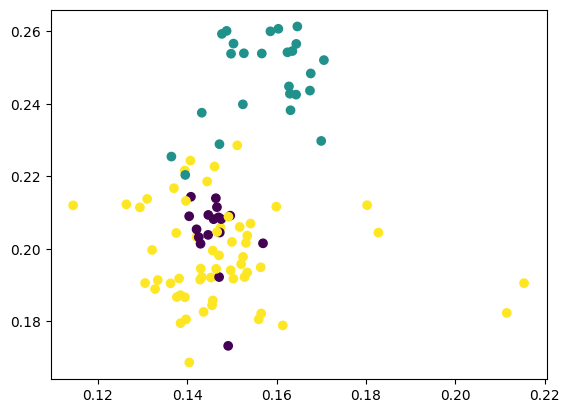

In [94]:
plt.scatter(dist2shap1_test, dist2shap2_test, c=y_test[:100])


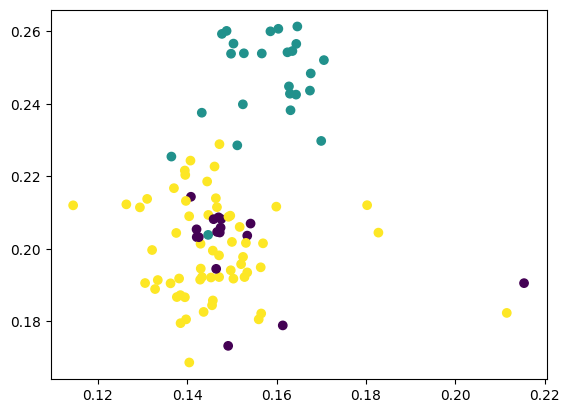

In [95]:
plt.scatter(dist2shap1_test, dist2shap2_test, c=knn.predict(np.array([dist2shap1_test, dist2shap2_test]).T))

(0.16, 0.2799165272122398)

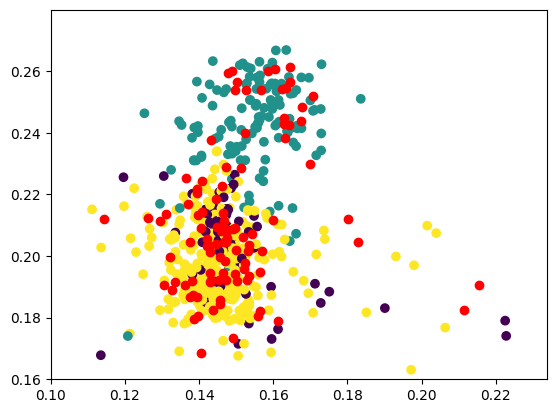

In [96]:
plt.scatter(dist2shap1_train, dist2shap2_train, c=y)
plt.scatter(dist2shap1_test, dist2shap2_test, c='r')
plt.xlim(0.10)
plt.ylim(0.16)